# Read flatclust clusters and masks
- clu files: clu_Cxx.txt (xx is syllable number +1; 11 is introductory note)
- masks file: masks.mat

In [1]:
import scipy.io as sio
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [2]:
meta_path = os.path.abspath('/Volumes/Samsung_X5/microdrive/b11k10/MetaData/2019-06-12-7061')

masks_file = 'masks.mat'




#### Read masks

In [3]:
# read the matlab file
masks_f_path = os.path.join(meta_path, masks_file)
masks_mat = sio.loadmat(masks_f_path)
masks_df = pd.DataFrame({'file': masks_mat['files'].flatten(), 
                         'masks': masks_mat['masks'].flatten(),
                        'song': masks_mat['song'].flatten()})
# clean up files field
masks_df['file'] = masks_df['file'].apply(lambda x: np.array2string(x.squeeze()).strip('\'').split('.')[0])

#clean up masks arrays
masks_df['masks'] = masks_df['masks'].apply(np.squeeze)
masks_df.head()

,file,masks,song
0,b11k10D-f00009,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[28972], [45618]]"
1,b11k10D-f00052,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[[]]
2,b11k10D-f00061,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[[]]
3,b11k10D-f00076,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[[]]
4,b11k10D-f00077,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[29185], [70501]]"


In [47]:
a_mask, a_song, a_file = tuple([masks_df.loc[22][f] for f in ['masks', 'song', 'file']])

In [48]:
a_mask.shape

(4011,)

In [22]:
a_song/32

array([[  744.53125,  6957.     , 11672.75   ],
       [ 3890.46875, 10914.625  , 14604.96875]])

In [18]:
np.repeat(np.array([0, 1]), a_song.shape[1]).reshape(a_song.shape)

array([[0, 0, 0],
       [1, 1, 1]])

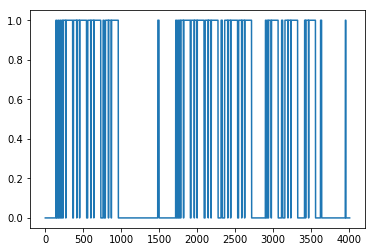

In [20]:
plt.plot(a_mask)
song_values = np.repeat(np.array([0, 1]), a_song.shape[1]).reshape(a_song.shape)
#plt.plot(a_song, song_values)

### Read clusters

In [43]:
# read the clusters file
def read_clu_file(meta_path, clu, prefix='song'):
    clu_file = '{}_C{}.txt'.format(prefix, clu)
    clu_pd = pd.read_csv(os.path.join(meta_path, clu_file), sep='\t')
    clu_pd['filename'] = clu_pd['filename'].apply(lambda x: x.split('.')[0])
    clu_pd['clu'] = clu
    return clu_pd

clu_list = [2, 11]
clu_pd = pd.concat([read_clu_file(meta_path, clu) for clu in clu_list])

In [44]:
clu_pd.head()

,filename,segon,segoff,clu
0,b11k10D-f01765,50653,3699,2
1,b11k10D-f01587,88946,4664,2
2,b11k10D-f01947,29800,4567,2
3,b11k10D-f00154,88074,3892,2
4,b11k10D-f02286,30732,3942,2


In [45]:
clu_pd = clu_pd.set_index(['filename', 'clu']).sort_values(['filename', 'segon'])
clu_pd.head()

segon  segoff
filename       clu                
b11k10D-f00077 11   104106    1919
b11k10D-f00079 11    30730    2030
               11    99464    2145
               11   166660    1978
b11k10D-f00080 11    30798    2062

### look at bouts and masks
see the masks together with the syllables (clusters)

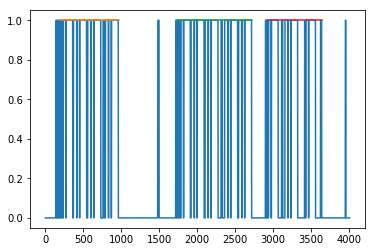

In [69]:
a_mask, a_song, a_file = tuple([masks_df.loc[22][f] for f in ['masks', 'song', 'file']])

plt.plot(a_mask)
song_values = np.repeat(np.array([1, 1]), a_song.shape[1]).reshape(a_song.shape)
plt.plot(a_song/128, song_values)

In [50]:
a_file

'b11k10D-f00095'

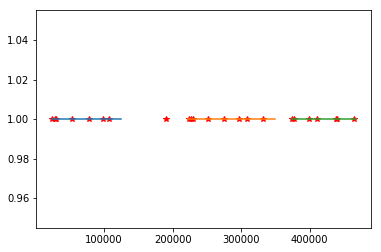

In [60]:
file_clu_pd = clu_pd.loc[a_file].sort_values('segon')
file_clu_pd['segon']
plt.plot(file_clu_pd['segon'], np.ones_like(file_clu_pd['segon']), 'r*')
#plt.plot(a_mask)
song_values = np.repeat(np.array([1, 1]), a_song.shape[1]).reshape(a_song.shape)
plt.plot(a_song, song_values)

In [55]:
file_clu_pd

,segon,segoff
clu,,
11,24849,1494
11,28293,1487
2,30731,4052
2,53723,4269
2,77585,4477
11,97907,1579
2,107341,4144
11,190141,2024
11,223648,1282


### get bouts

In [ ]:
# use the 